In [22]:

import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)
from ctc import ctc_loss
from ctc import ctc_alignment_targets



In [23]:
probs_seq1 = [[
            0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
            0.04377724, 0.01457421
        ]]

probs_seq2 = [[
            1.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
            0.04377724, 0.01457421
        ]]

In [24]:
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)


import ctc
#length_sec = 10.23
#lenght_char = 30
import numpy
path = [1,2,3]
lenght_char = len(path)

T, B, C = 6, 1, 7
t = lenght_char
blank = 0
device = 'cuda'
seed = 1
atol = 1e-3

for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

logits = torch.as_tensor(probs_seq2) #torch.randn(T, B, C, device = device).requires_grad_()
# import numpy
# logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

#targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
targets = torch.reshape(torch.as_tensor(numpy.array(path), dtype = torch.long, device = device), (B, t))

input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)

# print(logits)
# print(targets)
# print(input_lengths)
# print(target_lengths)

# # print(torch.cat([logits,logits1],dim=1))
# print(torch.cat([targets,targets1],dim=0))
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

tic = tictoc()
builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
toc = tictoc()
builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)
print("loss: ", builtin_ctc)
# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

# tic = tictoc()
# alignment = ctc.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
# print('Alignment: ',tictoc() - tic)

# a = alignment[:, 0, :target_lengths[0]]
# # print(a.t().cpu())
# plt.subplot(211)
# plt.title('Input-Output Viterbi alignment')
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel('Output steps')
# plt.subplot(212)
# plt.title('CTC alignment targets')
# a = ce_alignment_targets[:, 0, :]
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel(f'Output symbols, blank {blank}')
# plt.subplots_adjust(hspace = 0.5)
# plt.savefig('alignment.png')
# torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)


RuntimeError: Expected 3-dimensional tensor, but got 2-dimensional tensor for argument #1 'log_probs' (while checking arguments for ctc_loss_cpu)

In [25]:
log_probs.shape

torch.Size([6, 7])

In [26]:
def find_path(prob, path):
    import ctc
    import time
    import matplotlib.pyplot as plt

    import torch
    import torch.nn.functional as F
    torch.set_printoptions(precision=2)


    # import ctc

    T, B, C = len(prob), 1, len(prob[0])
    t = len(path)
    blank = 0
    device = 'cuda'
    seed = 1
    atol = 1e-3
#     for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
#         set_seed(seed)
    tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

    # logits = torch.randn(T, B, C, device = device).requires_grad_()
    import numpy
    logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(prob)),device = device), (T,B,C)).requires_grad_()

    # targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
    targets = torch.reshape(torch.as_tensor(path, dtype = torch.long, device = device), (B, t))



    input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
    target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
    log_probs = logits.log_softmax(dim = -1)
    print(log_probs)
    if print_flag:
        print("log_probs",log_probs)
    if print_flag:
        print('Device:', device)
    if print_flag:
        print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

    tic = tictoc()
    builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
    print(builtin_ctc)
    toc = tictoc()
    builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
    print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

    tic = tictoc()
    custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
    toc = tictoc()
    custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
    print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

    ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
    ce_ctc = -ce_alignment_targets * log_probs
    ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

    print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
    print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
    print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

    alignment = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
    a = alignment[:, 0, :target_lengths[0]]
    # print(a.t().cpu())
    plt.subplot(311)
    plt.title('Input-Output maxt CTC Viterbi alignment')
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel('Output steps')
    plt.subplot(312)
    plt.title('CTC alignment targets')
    a = ce_alignment_targets[:, 0, :]
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel(f'Output symbols, blank {blank}')
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig('alignment.png')
    torch.set_printoptions(precision=2)
    # print(a.t().cpu())
    # print(targets[:,0])
    # print(logits)

    plt.subplot(313)
    alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
    a = alignment[:, 0, :target_lengths[0]]
    # print(a.t().cpu())
    plt.title('Input-Output max prob. Viterbi alignment')
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel('Output steps')

In [27]:
print_flag = False
find_path(probs_seq2, [1,2,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([6.07], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0010306835174560547 bwd 0.0004496574401855469
Custom CTC loss fwd 0.003070354461669922 bwd 0.003614664077758789


RuntimeError: expected device cuda:0 and dtype Double but got device cuda:0 and dtype Bool

In [28]:
print_flag = False
find_path(probs_seq2, [0,1,0,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.42], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0009593963623046875 bwd 0.0005650520324707031
Custom CTC loss fwd 0.0030999183654785156 bwd 0.003850221633911133


RuntimeError: expected device cuda:0 and dtype Double but got device cuda:0 and dtype Bool

In [57]:
numpy.argmax(probs_seq2, axis=1)

array([0, 1, 1, 1, 0, 3])

In [60]:
print_flag = False
find_path(probs_seq2, [1,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.24], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.001239776611328125 bwd 0.0006277561187744141


In [64]:
print_flag = False
find_path(probs_seq2, [1,0,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.23], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0011248588562011719 bwd 0.0004520416259765625


In [65]:
print_flag = False
find_path(probs_seq2, [0,1,0,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.42], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0009894371032714844 bwd 0.00037932395935058594


In [67]:
print_flag = False
find_path(probs_seq2, [0, 1, 1, 0, 3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([6.56], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0011601448059082031 bwd 0.00038814544677734375


In [68]:
print_flag = False
find_path(probs_seq2, [0, 1, 0, 3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.42], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0013682842254638672 bwd 0.0006225109100341797


In [8]:
print_flag = False

logits shape (time X batch X channels): 6x1x7
Device: cpu
Log-probs shape (time X batch X channels): 6x1x7
Built-in CTC loss fwd 0.000484466552734375 bwd 0.0005323886871337891
Custom CTC loss fwd 0.0023224353790283203 bwd 0.0022423267364501953
Custom loss matches: True
Grad matches: True
CE grad matches: True


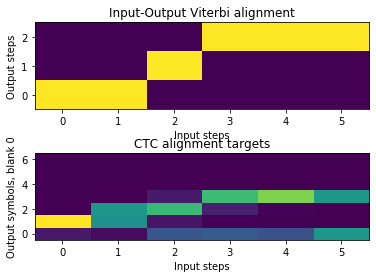

In [32]:
import torch
import torch.nn.functional as F
print_flag = False
#@torch.jit.script
def ctc_loss(log_probs, targets, input_lengths, target_lengths, blank : int = 0, reduction : str = 'none', alignment : bool = False):
	B = torch.arange(len(targets), device = input_lengths.device)
	if print_flag:
		print("B,",B)
	if print_flag:
		print("targets,",targets)
	targets_ = torch.cat([targets, targets[:, :1]], dim = -1)
	if print_flag:
		print("targets_,",targets_)
	targets_ = torch.stack([torch.full_like(targets_, blank), targets_], dim = -1).flatten(start_dim = -2)
	if print_flag:
		print("targets_,",targets_)
	if print_flag:
		print("targets_[:, 2:] != targets_[:, :-2],", targets_[:, 2:] != targets_[:, :-2])
	if print_flag:
		print("targets_[:, 2:],",targets_[:, 2:])
	if print_flag:
		print("targets_[:, :-2],",targets_[:, :-2])
	diff_labels = torch.cat([torch.as_tensor([[False, False]], device = targets.device).expand(len(B), -1), targets_[:, 2:] != targets_[:, :-2]], dim = 1)
	if print_flag:
# 		diff_labels[:,3] = True
		print("diff_labels,",diff_labels)
	# if the -inf is used as neutral element, custom logsumexp must be used
	#zero = float('-inf')
	# to avoid nan grad in torch.logsumexp
	zero = torch.finfo(log_probs.dtype).min
	if print_flag:
		print("zero,",zero)

	zero, zero_padding = torch.tensor(zero, device = log_probs.device, dtype = log_probs.dtype), 2
	if print_flag:
		print("log_probs,",log_probs)
	log_probs_ = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("targets_.expand(len(log_probs), -1, -1),",targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("log_probs_,",log_probs_)
	log_alpha = torch.full((len(log_probs), len(B), zero_padding + targets_.shape[-1]), zero, device = log_probs.device, dtype = log_probs.dtype)
	log_alpha[0, :, zero_padding + 0] = log_probs[0, :, blank]
	if print_flag:
		print("log_probs[0, :, blank],",log_probs[0, :, blank])
	if print_flag:
		print("log_probs[0, B, targets_[:, 1]],",log_probs[0, B, targets_[:, 1]])
	log_alpha[0, :, zero_padding + 1] = log_probs[0, B, targets_[:, 1]]
	if print_flag:
		print("log_alpha.size(),",log_alpha.size())
	if print_flag:
		print("log_alpha,",log_alpha)
	# log_alpha[1:, :, zero_padding:] = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))[1:]
	for t in range(1, len(log_probs)):
		log_alpha[t, :, 2:] = log_probs_[t] + logadd(log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero))
	if print_flag:
		print("log_alpha,final:",log_alpha)
	t=len(log_probs)-1
	aa=torch.stack([log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero)])
	if print_flag:
		print("torch.stack",aa)
	if print_flag:
		print("torch.logsumexp(aa, dim = 0)", torch.logsumexp(aa, dim = 0))
	if print_flag:
		print("log_alpha,",log_alpha)
	if print_flag:
		print("[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2],",[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2])
	l1l2 = log_alpha[input_lengths - 1, B].gather(-1, torch.stack([zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2], dim = -1)) 
	loss = -torch.logsumexp(l1l2, dim = -1)
	if not alignment:
		return loss
	
	path = torch.zeros(len(log_alpha), len(B), device = log_alpha.device, dtype = torch.int64)
	if print_flag:
		print("path.size,", path.size())
	if print_flag:
		print("path,", path)
	path[input_lengths - 1, B] = zero_padding + 2 * target_lengths - 1 + l1l2.max(dim = -1).indices
	if print_flag:
		print("l1l2.max(dim = -1).indices", l1l2.max(dim = -1).indices)
	if print_flag:
		print("zero_padding + 2 * target_lengths - 1,", zero_padding + 2 * target_lengths - 1)
	if print_flag:
		print("path[input_lengths - 1, B],",path[input_lengths - 1, B])
	if print_flag:
		print("list(enumerate(path))[1:]),",list(enumerate(path))[1:])
	if print_flag:
		print("reversed(list(enumerate(path))[1:])",reversed(list(enumerate(path))[1:]))
	for t, indices in reversed(list(enumerate(path))[1:]):
# 		print("(t, indices)=",t, indices)
# 		print("diff_labels[B, (indices - zero_padding).clamp(min = 0)],",diff_labels[B, (indices - zero_padding).clamp(min = 0)])
# 		print("(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)]",(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)])
		indices_ = torch.stack([(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)], (indices - 1).clamp(min = 0), indices], dim = -1)
		path[t - 1] += (indices - 2 + log_alpha[t - 1, B].gather(-1, indices_).max(dim = -1).indices).clamp(min = 0)
# 		print("indices_",indices_)
# 		print("path",path)
	return torch.zeros_like(log_alpha).scatter_(-1, path.unsqueeze(-1), 1.0)[..., (zero_padding + 1)::2]

def ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank : int = 0, reduction : str = 'none', alignment : bool = False):
	B = torch.arange(len(targets), device = input_lengths.device)
	if print_flag:
		print("B,",B)
	if print_flag:
		print("targets,",targets)
	targets_ = torch.cat([targets, targets[:, :1]], dim = -1)
	if print_flag:
		print("targets_,",targets_)
	targets_ = torch.stack([torch.full_like(targets_, blank), targets_], dim = -1).flatten(start_dim = -2)
	if print_flag:
		print("targets_,",targets_)
	if print_flag:
		print("targets_[:, 2:] != targets_[:, :-2],", targets_[:, 2:] != targets_[:, :-2])
	if print_flag:
		print("targets_[:, 2:],",targets_[:, 2:])
	if print_flag:
		print("targets_[:, :-2],",targets_[:, :-2])
	diff_labels = torch.cat([torch.as_tensor([[False, False]], device = targets.device).expand(len(B), -1), targets_[:, 2:] != targets_[:, :-2]], dim = 1)
	if print_flag:
# 		diff_labels[:,3] = True
		print("diff_labels,",diff_labels)
	# if the -inf is used as neutral element, custom logsumexp must be used
	#zero = float('-inf')
	# to avoid nan grad in torch.logsumexp
	zero = torch.finfo(log_probs.dtype).min
	if print_flag:
		print("zero,",zero)

	zero, zero_padding = torch.tensor(zero, device = log_probs.device, dtype = log_probs.dtype), 2
	if print_flag:
		print("log_probs,",log_probs)
	log_probs_ = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("targets_.expand(len(log_probs), -1, -1),",targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("log_probs_,",log_probs_)
	log_alpha = torch.full((len(log_probs), len(B), zero_padding + targets_.shape[-1]), zero, device = log_probs.device, dtype = log_probs.dtype)
	log_alpha[0, :, zero_padding + 0] = log_probs[0, :, blank]
	if print_flag:
		print("log_probs[0, :, blank],",log_probs[0, :, blank])
	if print_flag:
		print("log_probs[0, B, targets_[:, 1]],",log_probs[0, B, targets_[:, 1]])
	log_alpha[0, :, zero_padding + 1] = log_probs[0, B, targets_[:, 1]]
	if print_flag:
		print("log_alpha.size(),",log_alpha.size())
	if print_flag:
		print("log_alpha,",log_alpha)
	# log_alpha[1:, :, zero_padding:] = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))[1:]
	for t in range(1, len(log_probs)):
		log_alpha[t, :, 2:] = log_probs_[t] + logmax(log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero))
	if print_flag:
		print("log_alpha,final:",log_alpha)
	t=len(log_probs)-1
	aa=torch.stack([log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero)])
	if print_flag:
		print("torch.stack",aa)
	if print_flag:
		print("torch.logsumexp(aa, dim = 0)", torch.logsumexp(aa, dim = 0))
	if print_flag:
		print("log_alpha,",log_alpha)
	if print_flag:
		print("[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2],",[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2])
	l1l2 = log_alpha[input_lengths - 1, B].gather(-1, torch.stack([zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2], dim = -1)) 
	loss = -torch.logsumexp(l1l2, dim = -1)
	if not alignment:
		return loss
	
	path = torch.zeros(len(log_alpha), len(B), device = log_alpha.device, dtype = torch.int64)
	if print_flag:
		print("path.size,", path.size())
	if print_flag:
		print("path,", path)
	path[input_lengths - 1, B] = zero_padding + 2 * target_lengths - 1 + l1l2.max(dim = -1).indices
# 	print("l1l2.max(dim = -1).indices", l1l2.max(dim = -1).indices)
# 	print("zero_padding + 2 * target_lengths - 1,", zero_padding + 2 * target_lengths - 1)
# 	print("path[input_lengths - 1, B],",path[input_lengths - 1, B])
# 	print("list(enumerate(path))[1:]),",list(enumerate(path))[1:])
# 	print("reversed(list(enumerate(path))[1:])",reversed(list(enumerate(path))[1:]))
	for t, indices in reversed(list(enumerate(path))[1:]):
# 		print("(t, indices)=",t, indices)
# 		print("diff_labels[B, (indices - zero_padding).clamp(min = 0)],",diff_labels[B, (indices - zero_padding).clamp(min = 0)])
# 		print("(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)]",(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)])
		indices_ = torch.stack([(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)].type(torch.long), (indices - 1).clamp(min = 0), indices], dim = -1)
		path[t - 1] += (indices - 2 + log_alpha[t - 1, B].gather(-1, indices_).max(dim = -1).indices).clamp(min = 0)
# 		print("indices_",indices_)
# 		print("path",path)
	return torch.zeros_like(log_alpha).scatter_(-1, path.unsqueeze(-1), 1.0)[..., (zero_padding + 1)::2]



def ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0, ctc_loss = F.ctc_loss, retain_graph = True):
	loss = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = blank, reduction = 'sum')
	probs = log_probs.exp()
	# to simplify API we inline log_softmax gradient, i.e. next two lines are equivalent to: grad_logits, = torch.autograd.grad(loss, logits, retain_graph = True). gradient formula explained at https://stackoverflow.com/questions/35304393/trying-to-understand-code-that-computes-the-gradient-wrt-to-the-input-for-logsof
	grad_log_probs, = torch.autograd.grad(loss, log_probs, retain_graph = retain_graph)
	grad_logits = grad_log_probs - probs * grad_log_probs.sum(dim = -1, keepdim = True)
	temporal_mask = (torch.arange(len(log_probs), device = input_lengths.device, dtype = input_lengths.dtype).unsqueeze(1) < input_lengths.unsqueeze(0)).unsqueeze(-1)
	#print("temporal_mask", temporal_mask)
	#print("(probs * temporal_mask)",(probs * temporal_mask.type(torch.double)))
	return (probs * temporal_mask.type(torch.double) - grad_logits).detach()

def logmax(x0, x1, x2):
	# produces nan gradients in backward if -inf log-space zero element is used https://github.com/pytorch/pytorch/issues/31829
# 	print("torch.stack([x0, x1, x2])",torch.stack([x0, x1, x2]))
# 	print("torch.max(torch.stack([x0, x1, x2]), dim = 0",torch.max(torch.stack([x0, x1, x2]), dim = 0))
	return torch.max(torch.stack([x0, x1, x2]), dim = 0).values

def logadd(x0, x1, x2):
	# produces nan gradients in backward if -inf log-space zero element is used https://github.com/pytorch/pytorch/issues/31829
	return torch.logsumexp(torch.stack([x0, x1, x2]), dim = 0)
	
	# use if -inf log-space zero element is used
	#return LogsumexpFunction.apply(x0, x1, x2)
	
	# produces inplace modification error https://github.com/pytorch/pytorch/issues/31819
	#m = torch.max(torch.max(x0, x1), x2)
	#m = m.masked_fill(torch.isinf(m), 0)
	#res = (x0 - m).exp() + (x1 - m).exp() + (x2 - m).exp()
	#return res.log().add(m)

class LogsumexpFunction(torch.autograd.function.Function):
	@staticmethod
	def forward(self, x0, x1, x2):
		m = torch.max(torch.max(x0, x1), x2)
		m = m.masked_fill_(torch.isinf(m), 0)
		e0 = (x0 - m).exp_()
		e1 = (x1 - m).exp_()
		e2 = (x2 - m).exp_()
		e = (e0 + e1 + e2).clamp_(min = 1e-16)
		self.save_for_backward(e0, e1, e2, e)
		return e.log().add_(m)

	@staticmethod
	def backward(self, grad_output):
		e0, e1, e2, e = self.saved_tensors
		g = grad_output / e
		return g * e0, g * e1, g * e2
    
probs_seq1 = [[
            0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.1333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.18963251, 0.19860937,
            0.04377724, 0.01457421
        ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=4)


# import ctc

T, B, C = 6, 1, 7
t = 3
blank = 0
device = 'cpu'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

# logits = torch.randn(T, B, C, device = device).requires_grad_()
import numpy
logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

# targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
#print("log_probs",log_probs)
print('logits shape (time X batch X channels):', 'x'.join(map(str, logits.shape)))
print('Device:', device)
print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

tic = tictoc()
builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
toc = tictoc()
builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

tic = tictoc()
custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
toc = tictoc()
custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
ce_ctc = -ce_alignment_targets * log_probs
ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
plt.subplot(212)
plt.title('CTC alignment targets')
a = ce_alignment_targets[:, 0, :]
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel(f'Output symbols, blank {blank}')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('alignment.png')
torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)

logits shape (time X batch X channels): 6x1x7
Device: cpu
Log-probs shape (time X batch X channels): 6x1x7


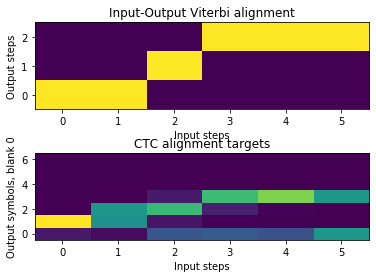

In [33]:
"""alignment function"""

import torch
import torch.nn.functional as F
print_flag = False
#@torch.jit.script
def ctc_loss(log_probs, targets, input_lengths, target_lengths, blank : int = 0, reduction : str = 'none', alignment : bool = False):
	B = torch.arange(len(targets), device = input_lengths.device)
	if print_flag:
		print("B,",B)
	if print_flag:
		print("targets,",targets)
	targets_ = torch.cat([targets, targets[:, :1]], dim = -1)
	if print_flag:
		print("targets_,",targets_)
	targets_ = torch.stack([torch.full_like(targets_, blank), targets_], dim = -1).flatten(start_dim = -2)
	if print_flag:
		print("targets_,",targets_)
	if print_flag:
		print("targets_[:, 2:] != targets_[:, :-2],", targets_[:, 2:] != targets_[:, :-2])
	if print_flag:
		print("targets_[:, 2:],",targets_[:, 2:])
	if print_flag:
		print("targets_[:, :-2],",targets_[:, :-2])
	diff_labels = torch.cat([torch.as_tensor([[False, False]], device = targets.device).expand(len(B), -1), targets_[:, 2:] != targets_[:, :-2]], dim = 1)
	if print_flag:
# 		diff_labels[:,3] = True
		print("diff_labels,",diff_labels)
	# if the -inf is used as neutral element, custom logsumexp must be used
	#zero = float('-inf')
	# to avoid nan grad in torch.logsumexp
	zero = torch.finfo(log_probs.dtype).min
	if print_flag:
		print("zero,",zero)

	zero, zero_padding = torch.tensor(zero, device = log_probs.device, dtype = log_probs.dtype), 2
	if print_flag:
		print("log_probs,",log_probs)
	log_probs_ = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("targets_.expand(len(log_probs), -1, -1),",targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("log_probs_,",log_probs_)
	log_alpha = torch.full((len(log_probs), len(B), zero_padding + targets_.shape[-1]), zero, device = log_probs.device, dtype = log_probs.dtype)
	log_alpha[0, :, zero_padding + 0] = log_probs[0, :, blank]
	if print_flag:
		print("log_probs[0, :, blank],",log_probs[0, :, blank])
	if print_flag:
		print("log_probs[0, B, targets_[:, 1]],",log_probs[0, B, targets_[:, 1]])
	log_alpha[0, :, zero_padding + 1] = log_probs[0, B, targets_[:, 1]]
	if print_flag:
		print("log_alpha.size(),",log_alpha.size())
	if print_flag:
		print("log_alpha,",log_alpha)
	# log_alpha[1:, :, zero_padding:] = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))[1:]
	for t in range(1, len(log_probs)):
		log_alpha[t, :, 2:] = log_probs_[t] + logadd(log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero))
	if print_flag:
		print("log_alpha,final:",log_alpha)
	t=len(log_probs)-1
	aa=torch.stack([log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero)])
	if print_flag:
		print("torch.stack",aa)
	if print_flag:
		print("torch.logsumexp(aa, dim = 0)", torch.logsumexp(aa, dim = 0))
	if print_flag:
		print("log_alpha,",log_alpha)
	if print_flag:
		print("[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2],",[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2])
	l1l2 = log_alpha[input_lengths - 1, B].gather(-1, torch.stack([zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2], dim = -1)) 
	loss = -torch.logsumexp(l1l2, dim = -1)
	if not alignment:
		return loss
	
	path = torch.zeros(len(log_alpha), len(B), device = log_alpha.device, dtype = torch.int64)
	if print_flag:
		print("path.size,", path.size())
	if print_flag:
		print("path,", path)
	path[input_lengths - 1, B] = zero_padding + 2 * target_lengths - 1 + l1l2.max(dim = -1).indices
	if print_flag:
		print("l1l2.max(dim = -1).indices", l1l2.max(dim = -1).indices)
	if print_flag:
		print("zero_padding + 2 * target_lengths - 1,", zero_padding + 2 * target_lengths - 1)
	if print_flag:
		print("path[input_lengths - 1, B],",path[input_lengths - 1, B])
	if print_flag:
		print("list(enumerate(path))[1:]),",list(enumerate(path))[1:])
	if print_flag:
		print("reversed(list(enumerate(path))[1:])",reversed(list(enumerate(path))[1:]))
	for t, indices in reversed(list(enumerate(path))[1:]):
# 		print("(t, indices)=",t, indices)
# 		print("diff_labels[B, (indices - zero_padding).clamp(min = 0)],",diff_labels[B, (indices - zero_padding).clamp(min = 0)])
# 		print("(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)]",(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)])
		indices_ = torch.stack([(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)], (indices - 1).clamp(min = 0), indices], dim = -1)
		path[t - 1] += (indices - 2 + log_alpha[t - 1, B].gather(-1, indices_).max(dim = -1).indices).clamp(min = 0)
# 		print("indices_",indices_)
# 		print("path",path)
	return torch.zeros_like(log_alpha).scatter_(-1, path.unsqueeze(-1), 1.0)[..., (zero_padding + 1)::2]

def ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank : int = 0, reduction : str = 'none', alignment : bool = False):
	B = torch.arange(len(targets), device = input_lengths.device)
	if print_flag:
		print("B,",B)
	if print_flag:
		print("targets,",targets)
	targets_ = torch.cat([targets, targets[:, :1]], dim = -1)
	if print_flag:
		print("targets_,",targets_)
	targets_ = torch.stack([torch.full_like(targets_, blank), targets_], dim = -1).flatten(start_dim = -2)
	if print_flag:
		print("targets_,",targets_)
	if print_flag:
		print("targets_[:, 2:] != targets_[:, :-2],", targets_[:, 2:] != targets_[:, :-2])
	if print_flag:
		print("targets_[:, 2:],",targets_[:, 2:])
	if print_flag:
		print("targets_[:, :-2],",targets_[:, :-2])
	diff_labels = torch.cat([torch.as_tensor([[False, False]], device = targets.device).expand(len(B), -1), targets_[:, 2:] != targets_[:, :-2]], dim = 1)
	if print_flag:
# 		diff_labels[:,3] = True
		print("diff_labels,",diff_labels)
	# if the -inf is used as neutral element, custom logsumexp must be used
	#zero = float('-inf')
	# to avoid nan grad in torch.logsumexp
	zero = torch.finfo(log_probs.dtype).min
	if print_flag:
		print("zero,",zero)

	zero, zero_padding = torch.tensor(zero, device = log_probs.device, dtype = log_probs.dtype), 2
	if print_flag:
		print("log_probs,",log_probs)
	log_probs_ = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("targets_.expand(len(log_probs), -1, -1),",targets_.expand(len(log_probs), -1, -1))
	if print_flag:
		print("log_probs_,",log_probs_)
	log_alpha = torch.full((len(log_probs), len(B), zero_padding + targets_.shape[-1]), zero, device = log_probs.device, dtype = log_probs.dtype)
	log_alpha[0, :, zero_padding + 0] = log_probs[0, :, blank]
	if print_flag:
		print("log_probs[0, :, blank],",log_probs[0, :, blank])
	if print_flag:
		print("log_probs[0, B, targets_[:, 1]],",log_probs[0, B, targets_[:, 1]])
	log_alpha[0, :, zero_padding + 1] = log_probs[0, B, targets_[:, 1]]
	if print_flag:
		print("log_alpha.size(),",log_alpha.size())
	if print_flag:
		print("log_alpha,",log_alpha)
	# log_alpha[1:, :, zero_padding:] = log_probs.gather(-1, targets_.expand(len(log_probs), -1, -1))[1:]
	for t in range(1, len(log_probs)):
		log_alpha[t, :, 2:] = log_probs_[t] + logmax(log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero))
	if print_flag:
		print("log_alpha,final:",log_alpha)
	t=len(log_probs)-1
	aa=torch.stack([log_alpha[t - 1, :, 2:], log_alpha[t - 1, :, 1:-1], torch.where(diff_labels, log_alpha[t - 1, :, :-2], zero)])
	if print_flag:
		print("torch.stack",aa)
	if print_flag:
		print("torch.logsumexp(aa, dim = 0)", torch.logsumexp(aa, dim = 0))
	if print_flag:
		print("log_alpha,",log_alpha)
	if print_flag:
		print("[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2],",[zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2])
	l1l2 = log_alpha[input_lengths - 1, B].gather(-1, torch.stack([zero_padding + target_lengths * 2 - 1, zero_padding + target_lengths * 2], dim = -1)) 
	loss = -torch.logsumexp(l1l2, dim = -1)
	if not alignment:
		return loss
	
	path = torch.zeros(len(log_alpha), len(B), device = log_alpha.device, dtype = torch.int64)
	if print_flag:
		print("path.size,", path.size())
	if print_flag:
		print("path,", path)
	path[input_lengths - 1, B] = zero_padding + 2 * target_lengths - 1 + l1l2.max(dim = -1).indices
# 	print("l1l2.max(dim = -1).indices", l1l2.max(dim = -1).indices)
# 	print("zero_padding + 2 * target_lengths - 1,", zero_padding + 2 * target_lengths - 1)
# 	print("path[input_lengths - 1, B],",path[input_lengths - 1, B])
# 	print("list(enumerate(path))[1:]),",list(enumerate(path))[1:])
# 	print("reversed(list(enumerate(path))[1:])",reversed(list(enumerate(path))[1:]))
	for t, indices in reversed(list(enumerate(path))[1:]):
# 		print("(t, indices)=",t, indices)
# 		print("diff_labels[B, (indices - zero_padding).clamp(min = 0)],",diff_labels[B, (indices - zero_padding).clamp(min = 0)])
# 		print("(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)]",(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)])
		indices_ = torch.stack([(indices - 2) * diff_labels[B, (indices - zero_padding).clamp(min = 0)].type(torch.long), (indices - 1).clamp(min = 0), indices], dim = -1)
		path[t - 1] += (indices - 2 + log_alpha[t - 1, B].gather(-1, indices_).max(dim = -1).indices).clamp(min = 0)
# 		print("indices_",indices_)
# 		print("path",path)
	return torch.zeros_like(log_alpha).scatter_(-1, path.unsqueeze(-1), 1.0)[..., (zero_padding + 1)::2]



def ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0, ctc_loss = F.ctc_loss, retain_graph = True):
	loss = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = blank, reduction = 'sum')
	probs = log_probs.exp()
	# to simplify API we inline log_softmax gradient, i.e. next two lines are equivalent to: grad_logits, = torch.autograd.grad(loss, logits, retain_graph = True). gradient formula explained at https://stackoverflow.com/questions/35304393/trying-to-understand-code-that-computes-the-gradient-wrt-to-the-input-for-logsof
	grad_log_probs, = torch.autograd.grad(loss, log_probs, retain_graph = retain_graph)
	grad_logits = grad_log_probs - probs * grad_log_probs.sum(dim = -1, keepdim = True)
	temporal_mask = (torch.arange(len(log_probs), device = input_lengths.device, dtype = input_lengths.dtype).unsqueeze(1) < input_lengths.unsqueeze(0)).unsqueeze(-1)
	#print("temporal_mask", temporal_mask)
	#print("(probs * temporal_mask)",(probs * temporal_mask.type(torch.double)))
	return (probs * temporal_mask.type(torch.double) - grad_logits).detach()

def logmax(x0, x1, x2):
	# produces nan gradients in backward if -inf log-space zero element is used https://github.com/pytorch/pytorch/issues/31829
# 	print("torch.stack([x0, x1, x2])",torch.stack([x0, x1, x2]))
# 	print("torch.max(torch.stack([x0, x1, x2]), dim = 0",torch.max(torch.stack([x0, x1, x2]), dim = 0))
	return torch.max(torch.stack([x0, x1, x2]), dim = 0).values

def logadd(x0, x1, x2):
	# produces nan gradients in backward if -inf log-space zero element is used https://github.com/pytorch/pytorch/issues/31829
	return torch.logsumexp(torch.stack([x0, x1, x2]), dim = 0)
	
	# use if -inf log-space zero element is used
	#return LogsumexpFunction.apply(x0, x1, x2)
	
	# produces inplace modification error https://github.com/pytorch/pytorch/issues/31819
	#m = torch.max(torch.max(x0, x1), x2)
	#m = m.masked_fill(torch.isinf(m), 0)
	#res = (x0 - m).exp() + (x1 - m).exp() + (x2 - m).exp()
	#return res.log().add(m)

class LogsumexpFunction(torch.autograd.function.Function):
	@staticmethod
	def forward(self, x0, x1, x2):
		m = torch.max(torch.max(x0, x1), x2)
		m = m.masked_fill_(torch.isinf(m), 0)
		e0 = (x0 - m).exp_()
		e1 = (x1 - m).exp_()
		e2 = (x2 - m).exp_()
		e = (e0 + e1 + e2).clamp_(min = 1e-16)
		self.save_for_backward(e0, e1, e2, e)
		return e.log().add_(m)

	@staticmethod
	def backward(self, grad_output):
		e0, e1, e2, e = self.saved_tensors
		g = grad_output / e
		return g * e0, g * e1, g * e2
    
probs_seq1 = [[
            0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.1333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.18963251, 0.19860937,
            0.04377724, 0.01457421
        ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=4)


# import ctc

T, B, C = 6, 1, 7
t = 3
blank = 0
device = 'cpu'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

# logits = torch.randn(T, B, C, device = device).requires_grad_()
import numpy
logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

# targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
#print("log_probs",log_probs)
print('logits shape (time X batch X channels):', 'x'.join(map(str, logits.shape)))
print('Device:', device)
print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

# tic = tictoc()
# builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
# print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))


alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)

def alignment_plot(alignment, index=0):
    a = alignment[:, index, :target_lengths[index]]
    # print(a.t().cpu())
    plt.subplot(211)
    plt.title('Input-Output Viterbi alignment')
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel('Output steps')
    plt.subplot(212)
    plt.title('CTC alignment targets')
    a = ce_alignment_targets[:, 0, :]
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel(f'Output symbols, blank {blank}')
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig('alignment.png')
    torch.set_printoptions(precision=2)
    # print(a.t().cpu())
    # print(targets[:,0])
    # print(logits)
    
alignment_plot(alignment)

Built-in CTC loss fwd 0.00036525726318359375 bwd 0.0008625984191894531
Custom CTC loss fwd 0.007227182388305664 bwd 0.0047342777252197266
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False,  True, False,  True]], device='cuda:0')
targets_[:, 2:], tensor([[0, 2, 0, 3, 0, 1]], device='cuda:0')
targets_[:, :-2], tensor([[0, 1, 0, 2, 0, 3]], device='cuda:0')
diff_labels, tensor([[False, False, False,  True, False,  True, False,  True]],
       device='cuda:0')


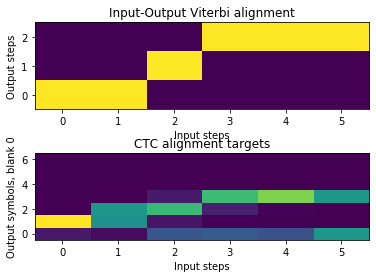

In [3]:
   
probs_seq1 = [[
            0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.1333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.18963251, 0.19860937,
            0.04377724, 0.01457421
        ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=4)


# import ctc

T, B, C = 6, 1, 7
t = 3
blank = 0
device = 'cuda'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

# logits = torch.randn(T, B, C, device = device).requires_grad_()
import numpy
logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

# targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

tic = tictoc()
builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
toc = tictoc()
builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

tic = tictoc()
custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
toc = tictoc()
custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
ce_ctc = -ce_alignment_targets * log_probs
ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
plt.subplot(212)
plt.title('CTC alignment targets')
a = ce_alignment_targets[:, 0, :]
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel(f'Output symbols, blank {blank}')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('alignment.png')
torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)

In [9]:
def find_path(prob, path):
    #import ctc
    import time
    import matplotlib.pyplot as plt

    import torch
    import torch.nn.functional as F
    torch.set_printoptions(precision=2)


    # import ctc

    T, B, C = len(prob), 1, len(prob[0])
    t = len(path)
    blank = 0
    device = 'cuda'
    seed = 1
    atol = 1e-3
#     for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
#         set_seed(seed)
    tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

    # logits = torch.randn(T, B, C, device = device).requires_grad_()
    import numpy
    logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(prob)),device = device), (T,B,C)).requires_grad_()

    # targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
    targets = torch.reshape(torch.as_tensor(path, dtype = torch.long, device = device), (B, t))



    input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
    target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
    log_probs = logits.log_softmax(dim = -1)
    print(log_probs)
    if print_flag:
        print("log_probs",log_probs)
    if print_flag:
        print('Device:', device)
    if print_flag:
        print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

    tic = tictoc()
    builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
    print(builtin_ctc)
    toc = tictoc()
    builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
    print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

    tic = tictoc()
    custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
    toc = tictoc()
    custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
    print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

    ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
    ce_ctc = -ce_alignment_targets * log_probs
    ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

    print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
    print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
    print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

    alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
    a = alignment[:, 0, :target_lengths[0]]
    # print(a.t().cpu())
    plt.subplot(311)
    plt.title('Input-Output maxt CTC Viterbi alignment')
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel('Output steps')
    plt.subplot(312)
    plt.title('CTC alignment targets')
    a = ce_alignment_targets[:, 0, :]
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel(f'Output symbols, blank {blank}')
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig('alignment.png')
    torch.set_printoptions(precision=2)
    # print(a.t().cpu())
    # print(targets[:,0])
    # print(logits)

    plt.subplot(313)
    alignment = ctc_max_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
    a = alignment[:, 0, :target_lengths[0]]
    # print(a.t().cpu())
    plt.title('Input-Output max prob. Viterbi alignment')
    plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
    plt.xlabel('Input steps')
    plt.ylabel('Output steps')

tensor([[[-2.94, -1.06, -1.49, -2.87, -3.51, -1.90, -1.99]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-2.35, -1.24, -6.14, -1.86, -1.91, -1.22, -4.28]],

        [[-2.00, -1.07, -1.86, -1.86, -1.82, -3.33, -4.43]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([8.32], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0010597705841064453 bwd 0.0007083415985107422
Custom CTC loss fwd 0.0033652782440185547 bwd 0.00420832633972168
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False,  True, False,  True, False,  True]],
       device='cuda:0')
targets_[:, 2:], tensor([[0, 1, 0, 0, 0, 3, 0, 0]], device='cuda:0')
targets_[:, :-2], tensor([[0, 0, 0, 1, 0, 0, 0, 3]], device='cuda:0')
dif

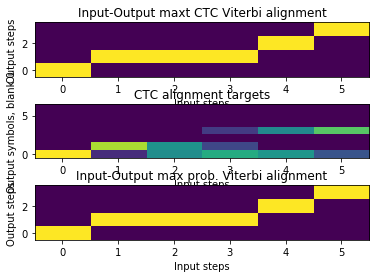

In [10]:
find_path(probs_seq1, [0, 1, 0, 3])

In [11]:
probs_seq1 = [[
            0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
            0.04377724, 0.01457421
        ]]

probs_seq2 = [[
            1.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
            0.18184413, 0.16493624
        ], [
            0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
            0.0094893, 0.06890021
        ], [
            0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
            0.08424043, 0.08120984
        ], [
            0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
            0.05206269, 0.09772094
        ], [
            0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
            0.41317442, 0.01946335
        ], [
            0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
            0.04377724, 0.01457421
        ]]

In [12]:
numpy.argmax(probs_seq2, axis=1)

array([0, 1, 1, 1, 0, 3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.24], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.001127481460571289 bwd 0.0008416175842285156
Custom CTC loss fwd 0.0035109519958496094 bwd 0.0041048526763916016
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False,  True]], device='cuda:0')
targets_[:, 2:], tensor([[0, 3, 0, 1]], device='cuda:0')
targets_[:, :-2], tensor([[0, 1, 0, 3]], device='cuda:0')
diff_labels, tensor([[False, False, False,  True, False,  Tru

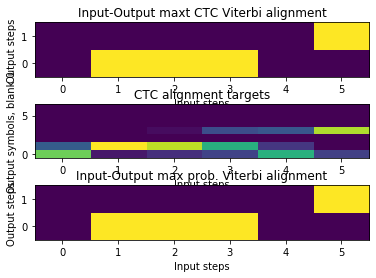

In [13]:
find_path(probs_seq2, [ 1, 3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.35], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.000978708267211914 bwd 0.0004546642303466797
Custom CTC loss fwd 0.003208160400390625 bwd 0.003793001174926758
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False,  True, False,  True]], device='cuda:0')
targets_[:, 2:], tensor([[0, 1, 0, 3, 0, 0]], device='cuda:0')
targets_[:, :-2], tensor([[0, 0, 0, 1, 0, 3]], device='cuda:0')
diff_labels, tensor([[False, False, F

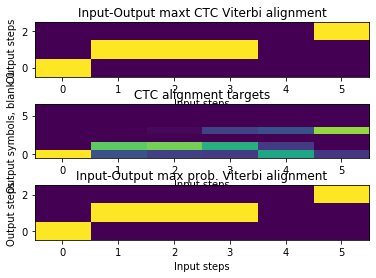

In [14]:
find_path(probs_seq2, [0, 1, 3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([4.42], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.00107574462890625 bwd 0.0006496906280517578
Custom CTC loss fwd 0.0034208297729492188 bwd 0.004040241241455078
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False,  True, False,  True, False,  True]],
       device='cuda:0')
targets_[:, 2:], tensor([[0, 1, 0, 0, 0, 3, 0, 0]], device='cuda:0')
targets_[:, :-2], tensor([[0, 0, 0, 1, 0, 0, 0, 3]], device='cuda:0')
diff

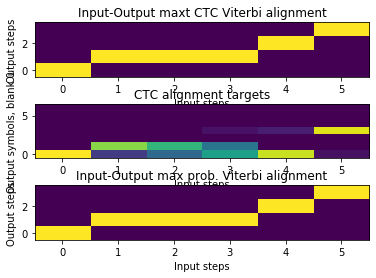

In [15]:
find_path(probs_seq2, [0, 1, 0,3])

tensor([[[-0.73, -1.66, -2.09, -3.47, -4.11, -2.50, -2.60]],

        [[-3.59, -1.03, -1.59, -2.52, -1.33, -4.84, -2.86]],

        [[-1.79, -0.96, -1.96, -2.73, -2.17, -2.74, -2.77]],

        [[-2.31, -1.09, -4.42, -1.47, -1.62, -3.15, -2.52]],

        [[-0.86, -1.69, -6.59, -2.31, -2.36, -1.67, -4.73]],

        [[-2.25, -1.32, -2.11, -1.07, -2.07, -3.58, -4.68]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<LogSoftmaxBackward>)
tensor([6.56], device='cuda:0', dtype=torch.float64, grad_fn=<CtcLossBackward>)
Built-in CTC loss fwd 0.0010478496551513672 bwd 0.0006487369537353516
Custom CTC loss fwd 0.0034797191619873047 bwd 0.004154682159423828
Custom loss matches: True
Grad matches: True
CE grad matches: True
targets_[:, 2:] != targets_[:, :-2], tensor([[False,  True, False, False, False,  True, False,  True, False,  True]],
       device='cuda:0')
targets_[:, 2:], tensor([[0, 1, 0, 1, 0, 0, 0, 3, 0, 0]], device='cuda:0')
targets_[:, :-2], tensor([[0, 0, 0, 1, 0, 1, 0, 0, 0

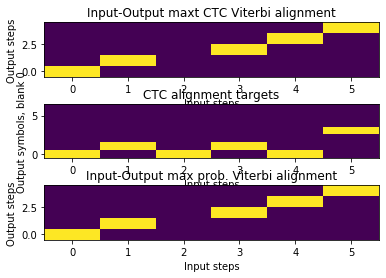

In [16]:
find_path(probs_seq2, [0,1, 1, 0,3])